In [2]:
import os
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import graphviz


data = pd.read_csv('cars_cosc3337.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,,,,,buying,maint,doors,persons,lug_boot,safety,class
NaN,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1


In [3]:
data['class'],class_names = pd.factorize(data['class'])
print(class_names)
print(data['class'].unique())

Index(['carb', '4', '1', '2', '3', '6', '8'], dtype='object')
[0 1 2 3 4 5 6]


In [4]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,,,,,buying,maint,doors,persons,lug_boot,safety,class
NaN,mpg,cyl,disp,hp,0,0,0,0,0,0,0
Mazda RX4,21,6,160,110,1,1,1,1,1,1,1
Mazda RX4 Wag,21,6,160,110,1,2,2,1,1,1,1
Datsun 710,22.8,4,108,93,2,3,3,2,1,1,2
Hornet 4 Drive,21.4,6,258,110,3,4,4,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33 entries, (nan, mpg, cyl, disp, hp) to (Volvo 142E, 21.4, 4, 121, 109)
Data columns (total 7 columns):
buying      33 non-null int64
maint       33 non-null int64
doors       33 non-null int64
persons     33 non-null int64
lug_boot    33 non-null int64
safety      33 non-null int64
class       33 non-null int64
dtypes: int64(7)
memory usage: 2.9+ KB


In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.3, random_state=0)

In [8]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [9]:
y_pred = dtree.predict(x_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified sampled: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified sampled: 5
Accuracy: 0.50


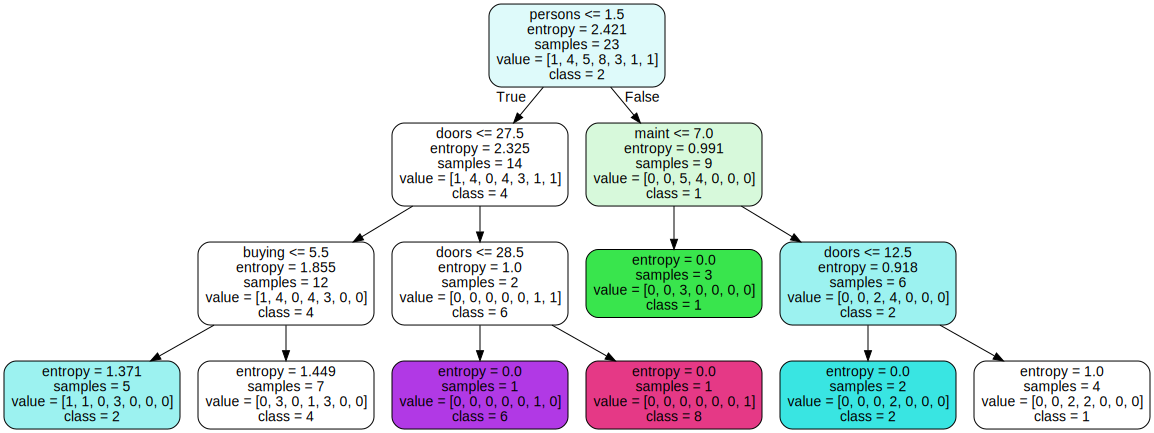

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file = None, filled=True, rounded=True,
                               feature_names=feature_names,
                               class_names=class_names)
graph = graphviz.Source(dot_data)
graph

In [11]:
c_m = confusion_matrix(y_test,y_pred)
print(c_m)

[[3 2 1]
 [0 1 1]
 [0 1 1]]


In [12]:
alpha = alphas[np.argmax(scores)]
regr = LogisticREgression(C=alpha,penalty='11')
regr.fit(x_train,y_train)

NameError: name 'alphas' is not defined